In [88]:
var('x,t')

F1(x) = 1 / sqrt(pi) * (22.38/(2*pi))^(1/2-x) * 1 / zeta(1-x) * gamma(1-x)
G1(x,t) = sqrt(abs((sin(pi*(x+i*t)))/cosh(pi*t)))


F2(x) = sqrt(2) / sqrt(pi) * (22.38/(2*pi))^(1/2-x) * gamma(1-x) / zeta(1-x)
G2(x,t) = abs(sin(pi / 2 *(x+i*t)))/cosh(pi / 2 * t)

# Finds the minimal height in the decreasing-increasing case. 
def interv_dec_inc(F,G, xmin, xmax, precision):
    if n(derivative(G,x)((xmax+xmin)/2,0))< 0:
        show('Warning: Negative derivative with increasing assumption')
    
    seglist = []
    step = (xmax-xmin)/precision
    height = 0
    for k in range(precision):
        a = xmin+k*step
        b = xmin+(k+1)*step
        
        while n(F(b)*G(a,height*step)) > 1 and height > 0:
            height -= 1
        while n(F(b)*G(a,height*step)) <= 1:
            height += 1
        
        seglist.append([(a,height*step),(b,height*step)])
    return seglist

# Finds the minimal height in the decreasing-decreasing case. 
def interv_dec_dec(F,G, xmin, xmax, precision):
    if n(derivative(G,x)((xmax+xmin)/2,0))> 0:
        show('Warning: Positive derivative with decreasing assumption')
    
    seglist = []
    step = (xmax-xmin)/precision
    height = 0
    for k in range(precision):
        a = xmin+k*step
        b = xmin+(k+1)*step
        
        while n(F(b)*G(b,height*step)) > 1 and height > 0:
            height -= 1
        while n(F(b)*G(b,height*step)) <= 1:
            height += 1
        
        seglist.append([(a,height*step),(b,height*step)])
    return seglist

# Function to compare two lists (usually one comes froms gamma_C and the other from gamma_R)
# and choose the worst one (in terms of height)
def worst_case(list1,list2):
    wlist = []
    lgt = min(len(list1),len(list2))
    for k in range(0,lgt):
        if list1[k][0][1]>list2[k][0][1]:
            wlist.append(list1[k])
        else:
            wlist.append(list2[k])
    return wlist


# Draw the segments
def draw(seglist):
    S = line(seglist[0])
    for l in range(1,len(seglist)):
        S = S+line(seglist[l])
    return S

# Zooming on interesting part
def zoom(seglist):
    if seglist[0][0][1] > 0:
        show('Good minimum already achieved')
        xmin = seglist[0][0][0]
    else:
        for l in range(len(seglist)):
            if seglist[l][0][1] == 0:
                next
            elif seglist[l-1][0][1] == 0:
                xmin = seglist[l][0][0]
            else:
                break
    if seglist[len(seglist)-1][1][1] > 0:
        show('Good maximum already achieved')
        xmax = seglist[len(seglist)-1][1][0] 
    else:
        for l in range(len(seglist)):
            if seglist[len(seglist)-l-1][0][1] == 0:
                next
            elif seglist[len(seglist)-l][0][1] == 0:
                xmax = seglist[len(seglist)-l-1][0][0]
            else:
                break
    
    return (xmin,xmax)


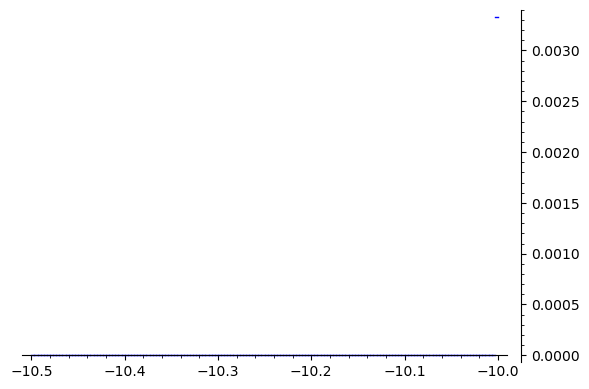

In [100]:
xmin, xmax = -10.5,-10
seglist = worst_case(
    interv_dec_dec(F1,G1,xmin,xmax,150),
    interv_dec_dec(F2,G2,xmin,xmax,150)
)

show(draw(seglist))

'Good maximum already achieved'

(-10.0000000000004, -10.0000000000000)

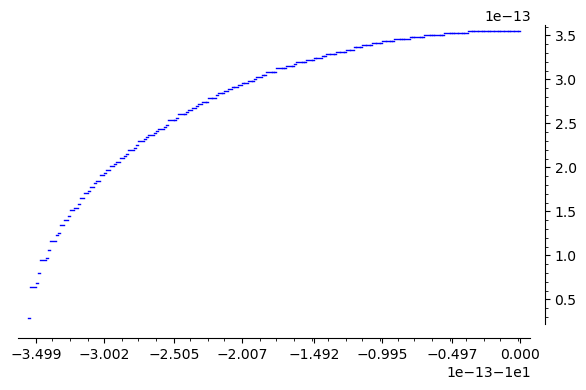

In [107]:
newbounds = zoom(seglist) 
show(newbounds)
xmin, xmax = newbounds[0], newbounds[1]

seglist = worst_case(
    interv_dec_dec(F1,G1,xmin,xmax,150),
    interv_dec_dec(F2,G2,xmin,xmax,150)
)
show(draw(seglist))